## **Project Title: Diabetes Progression Prediction**  

### **Introduction**  
Diabetes is a chronic disease or serious health problem that affects many people around the world. If not detected early, it can cause severe health issues. In this project, we will build a machine learning or deep learning model to predict diabetes using [Early Stage Diabetes Risk Prediction Dataset](https://www.kaggle.com/datasets/ishandutta/early-stage-diabetes-risk-prediction-dataset). By analyzing different features like age, gender, and various symptoms like polyuria, polydipsia, and sudden weight loss, along with the target variable (Class: Positive/Negative), we can check if a person is at risk of diabetes.

### **Overview**  
This project involves an end-to-end machine learning pipeline, including Exploratory Data Analysis (EDA), feature engineering, model training, and evaluation. We will compare various machine learning techniques such as Logistic Regression, Neural Networks, Decision Trees, and Random Forests to determine the best-performing model. 

Here, are the short descriptions of each columns present in datasets:

1. **Age** – Patient's age (20 to 65 years).  
2. **Gender** – Male or Female.  
3. **Polyuria** – Excessive urination (Yes/No).  
4. **Polydipsia** – Excessive thirst (Yes/No).  
5. **Sudden Weight Loss** – Rapid weight loss (Yes/No).  
6. **Weakness** – Feeling of fatigue (Yes/No).  
7. **Polyphagia** – Excessive hunger (Yes/No).  
8. **Genital Thrush** – Fungal infection (Yes/No).  
9. **Visual Blurring** – Blurred vision (Yes/No).  
10. **Itching** – Skin irritation (Yes/No).  
11. **Irritability** – Frequent mood swings (Yes/No).  
12. **Delayed Healing** – Slow wound healing (Yes/No).  
13. **Partial Paresis** – Muscle weakness (Yes/No).  
14. **Muscle Stiffness** – Stiff or tight muscles (Yes/No).  
15. **Alopecia** – Hair loss (Yes/No).  
16. **Obesity** – Overweight condition (Yes/No).  
17. **Class** – Target variable (Positive: Diabetic, Negative: Non-Diabetic).  

### **Objectives**  
This project aims to build a predictive model for diabetes progression using a "Early Stage Diabetes Risk Prediction Dataset". We will explore different machine learning algorithms, evaluate their performance, and identify the most effective model for accurate predictions.

### **Step 1: Import Necessary Libraries and Load the Datasets**

In [99]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import  accuracy_score, f1_score, classification_report, precision_score, confusion_matrix, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
import joblib

import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("diabetes.csv")

# Display first few rows
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### **Step 2: Basic Data Exploration**
Data exploration in ML is the process of examining our data to understand its structure, summary statistics, identify any missing values and visualize patterns before building a model.

In [100]:
# Check dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 520 rows and 17 columns.


In [101]:
# Check dataset columns names
print(f"Dataset contains {df.columns}")

Dataset contains Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [102]:
# Capitalize the first letter of each word of column names.
df.columns = df.columns.str.title()

In [103]:
# Check dataset columns names with first letter Capital 
print(f"Dataset contains {df.columns}")

Dataset contains Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'Sudden Weight Loss',
       'Weakness', 'Polyphagia', 'Genital Thrush', 'Visual Blurring',
       'Itching', 'Irritability', 'Delayed Healing', 'Partial Paresis',
       'Muscle Stiffness', 'Alopecia', 'Obesity', 'Class'],
      dtype='object')


In [104]:
# Check basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   Sudden Weight Loss  520 non-null    object
 5   Weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital Thrush      520 non-null    object
 8   Visual Blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  Delayed Healing     520 non-null    object
 12  Partial Paresis     520 non-null    object
 13  Muscle Stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  Class               520 no

In [105]:
# Check for missing values
print(df.isnull().sum())

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
Sudden Weight Loss    0
Weakness              0
Polyphagia            0
Genital Thrush        0
Visual Blurring       0
Itching               0
Irritability          0
Delayed Healing       0
Partial Paresis       0
Muscle Stiffness      0
Alopecia              0
Obesity               0
Class                 0
dtype: int64


In [106]:
# Summary statistics
print(df.describe())

              Age
count  520.000000
mean    48.028846
std     12.151466
min     16.000000
25%     39.000000
50%     47.500000
75%     57.000000
max     90.000000


In [107]:
# Check unique values in categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Gender: ['Male' 'Female']
Unique values in Polyuria: ['No' 'Yes']
Unique values in Polydipsia: ['Yes' 'No']
Unique values in Sudden Weight Loss: ['No' 'Yes']
Unique values in Weakness: ['Yes' 'No']
Unique values in Polyphagia: ['No' 'Yes']
Unique values in Genital Thrush: ['No' 'Yes']
Unique values in Visual Blurring: ['No' 'Yes']
Unique values in Itching: ['Yes' 'No']
Unique values in Irritability: ['No' 'Yes']
Unique values in Delayed Healing: ['Yes' 'No']
Unique values in Partial Paresis: ['No' 'Yes']
Unique values in Muscle Stiffness: ['Yes' 'No']
Unique values in Alopecia: ['Yes' 'No']
Unique values in Obesity: ['Yes' 'No']
Unique values in Class: ['Positive' 'Negative']


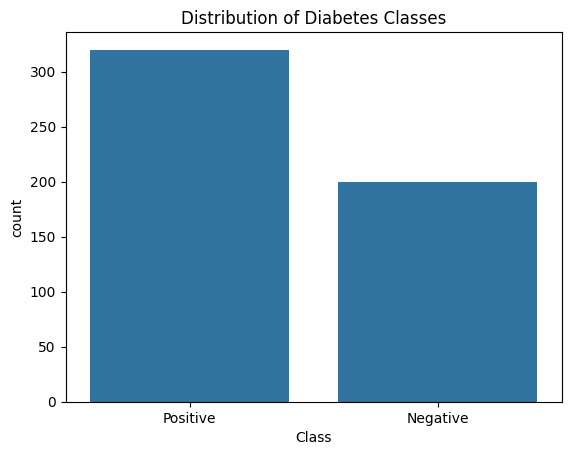

In [108]:
# Visualize the target variable distribution
sns.countplot(x='Class', data=df)
plt.title('Distribution of Diabetes Classes')
plt.show()

### **Step 3: Advance Data Exploration using Exploratory Data Analysis(EDA)**
Exploratory Data Analysis (EDA) is the process of looking at our data to understand main features like patterns, trends and anomalies, using charts and summary statistics before going to deeper analysis or building models.

#### **Distribution of Class Column (Target Variable)**

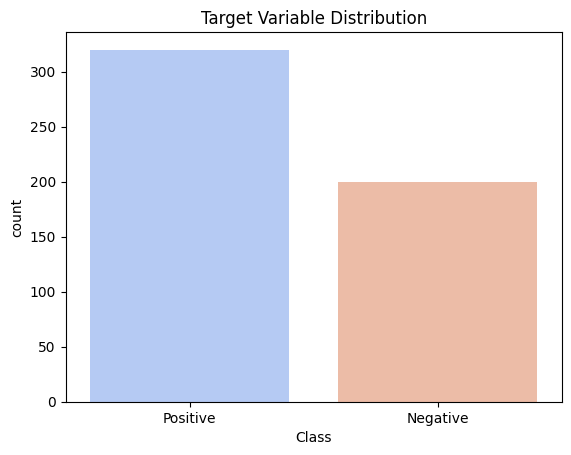

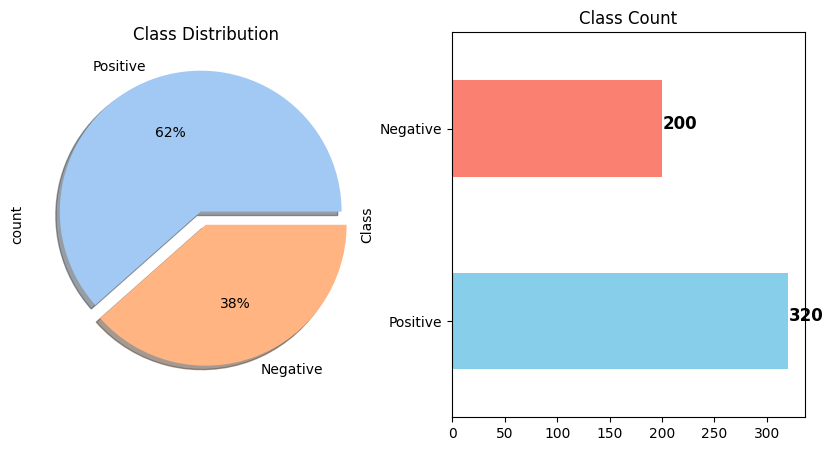

In [109]:
# Countplot for target variable
sns.countplot(x=df['Class'], palette="coolwarm")
plt.title("Target Variable Distribution")
plt.show()

# Pie chart and bar plot side by side
plt.figure(figsize=(10, 5))

# Pie Chart
plt.subplot(1, 2, 1)
df["Class"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"), 
                                    labels=["Positive", "Negative"], explode=[0.1, 0], shadow=True)
plt.title("Class Distribution")

# Bar Plot
plt.subplot(1, 2, 2)
ax = df["Class"].value_counts().plot(kind="barh", color=["skyblue", "salmon"])
for i, v in enumerate(df["Class"].value_counts()):
    ax.text(v + 1, i, str(v), fontsize=12, fontweight="bold")

plt.title("Class Count")
plt.show()

#### **1. Distribution of Age across the Class (Positive/Negative)**

In [110]:
# Find minimum and maximum age
min_age = df["Age"].min()
max_age = df["Age"].max()

# Calculate age range
age_range = max_age - min_age

print(f"Youngest Patient Age: {min_age}")
print(f"Oldest Patient Age: {max_age}")
print(f"Age Range: {age_range}")

Youngest Patient Age: 16
Oldest Patient Age: 90
Age Range: 74


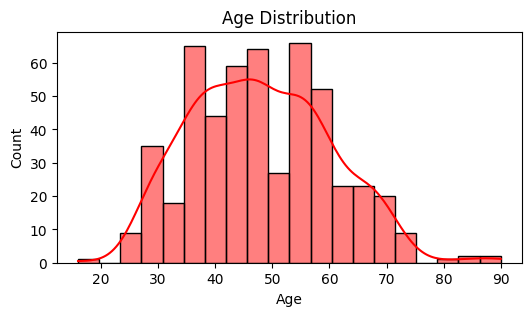

In [111]:
# Histogram plot for Age distribution 
plt.figure(figsize=(6, 3))
sns.histplot(df["Age"], bins=20, kde=True, color="red")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

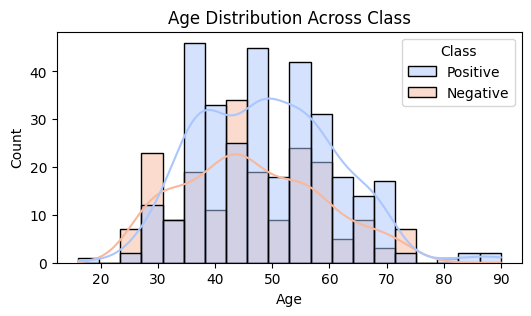

In [112]:
# Histogram with KDE plot for Age distribution across the class
plt.figure(figsize=(6,3))
sns.histplot(df, x="Age", hue="Class", kde=True, palette="coolwarm", bins=20)
plt.title("Age Distribution Across Class")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#### **2. Distribution of Gender across the Class (Positive/Negative)**

In [113]:
# Check the order of value_counts()
print(df["Gender"].value_counts())

# If "Male" appears first and "Female" second, you should keep labels as ["Male", "Female"]
# If "Female" appears first and "Male" second, change labels to ["Female", "Male"]


Gender
Male      328
Female    192
Name: count, dtype: int64


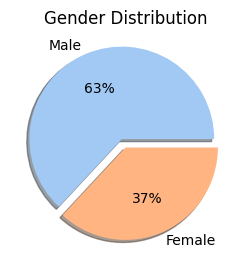

In [114]:
# Pie chart for Gender Distribution
plt.figure(figsize=(5, 3))
df["Gender"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                     labels=["Male", "Female"], explode=[0.1, 0], shadow=True)

plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


In [115]:
# Crosstab for Gender and Class Distribution (Percentage Format)
plot_criteria = ['Gender', 'Class']
cm = sns.light_palette("red", as_cmap=True)

crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)

Class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


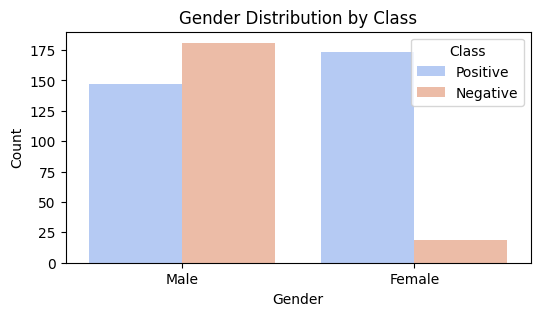

In [116]:
# Countplot for Gender Distribution across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Gender", hue="Class", data=df, palette="coolwarm")
plt.title("Gender Distribution by Class")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#### **3. Distribution of Polyuria(Excessive urination) across the Class (Positive/Negative)**

In [117]:
# Check the order of value_counts()
print(df["Polyuria"].value_counts())

# If "No" appears first and "Yes" second, you should keep labels as ["No", "Yes"]
# If "Yes" appears first and "No" second, change labels to ["Yes", "No"]


Polyuria
No     262
Yes    258
Name: count, dtype: int64


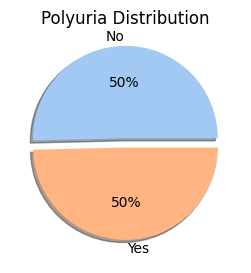

In [118]:
# Pie Chart for Polyuria Distribution
plt.figure(figsize=(5, 3))
df["Polyuria"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                       labels=["No", "Yes"], explode=[0.1, 0], shadow=True)
plt.title("Polyuria Distribution")
plt.ylabel("")
plt.show()

In [119]:
# Crosstab for Polyuria and Class
plot_criteria = ["Polyuria", "Class"]
cm = sns.light_palette("red", as_cmap=True)
crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)


Class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


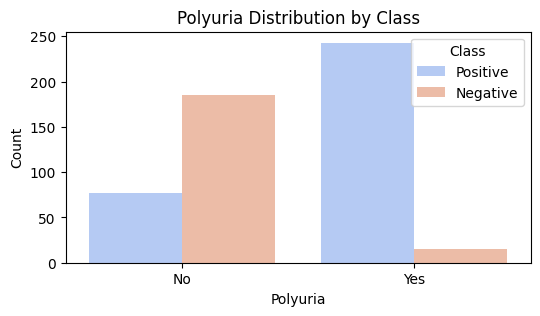

In [120]:
# Countplot for Polyuria across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Polyuria", hue="Class", data=df, palette="coolwarm")
plt.title("Polyuria Distribution by Class")
plt.xlabel("Polyuria")
plt.ylabel("Count")
plt.show()

#### **4. Distribution of Polydipsia(Excessive thirst) across the Class (Positive/Negative)**

In [121]:
# Check the order of value_counts()
print(df["Polydipsia"].value_counts())

# If "No" appears first and "Yes" second, you should keep labels as ["No", "Yes"]
# If "Yes" appears first and "No" second, change labels to ["Yes", "No"]


Polydipsia
No     287
Yes    233
Name: count, dtype: int64


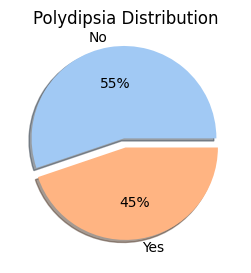

In [122]:
# Pie Chart for Polydipsia Distribution
plt.figure(figsize=(5, 3))
df["Polydipsia"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                         labels=["No", "Yes"], explode=[0.1, 0], shadow=True)
plt.title("Polydipsia Distribution")
plt.ylabel("")
plt.show()


In [123]:
# Crosstab for Polydipsia and Class
plot_criteria = ["Polydipsia", "Class"]
cm = sns.light_palette("red", as_cmap=True)
crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)


Class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


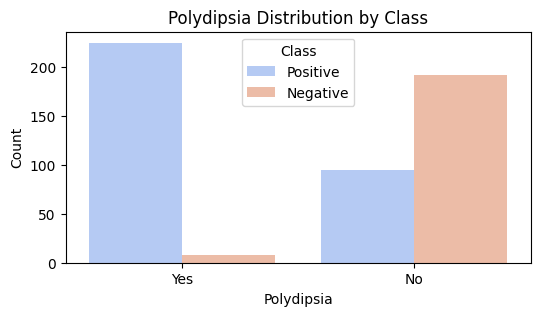

In [124]:
# Countplot for Polydipsia across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Polydipsia", hue="Class", data=df, palette="coolwarm")
plt.title("Polydipsia Distribution by Class")
plt.xlabel("Polydipsia")
plt.ylabel("Count")
plt.show()

#### **5. Distribution of Sudden Weight Loss across the Class (Positive/Negative)**

In [125]:
# Check the order of value_counts()
print(df["Sudden Weight Loss"].value_counts())

Sudden Weight Loss
No     303
Yes    217
Name: count, dtype: int64


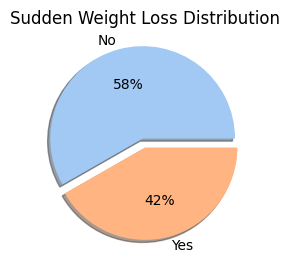

In [126]:
# Pie Chart for Sudden Weight Loss Distribution
plt.figure(figsize=(5, 3))
df["Sudden Weight Loss"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                                 labels=["No", "Yes"], explode=[0.1, 0], shadow=True)
plt.title("Sudden Weight Loss Distribution")
plt.ylabel("")
plt.show()


In [127]:
# Crosstab for Sudden Weight Loss and Class
plot_criteria = ["Sudden Weight Loss", "Class"]
cm = sns.light_palette("red", as_cmap=True)
crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)


Class,Negative,Positive
Sudden Weight Loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


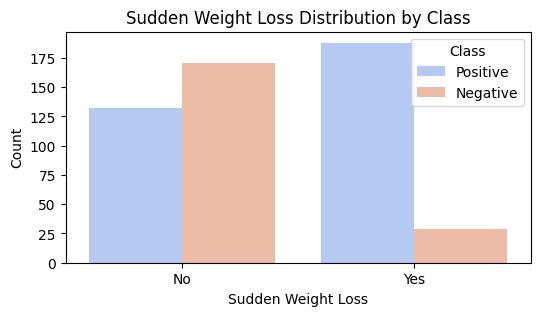

In [128]:
# Countplot for Sudden Weight Loss across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Sudden Weight Loss", hue="Class", data=df, palette="coolwarm")
plt.title("Sudden Weight Loss Distribution by Class")
plt.xlabel("Sudden Weight Loss")
plt.ylabel("Count")
plt.show()

#### **6. Distribution of Weakness across the Class (Positive/Negative)**

In [129]:
# Check the order of value_counts()
print(df["Weakness"].value_counts())

Weakness
Yes    305
No     215
Name: count, dtype: int64


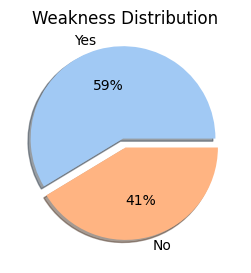

In [130]:
# Pie Chart for Weakness Distribution
plt.figure(figsize=(5, 3))
df["Weakness"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                       labels=["Yes", "No"], explode=[0.1, 0], shadow=True)
plt.title("Weakness Distribution")
plt.ylabel("") # Hide y-label
plt.show()

In [131]:
# Crosstab for Weakness and Class
plot_criteria = ["Weakness", "Class"]
cm = sns.light_palette("red", as_cmap=True)
crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)


Class,Negative,Positive
Weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


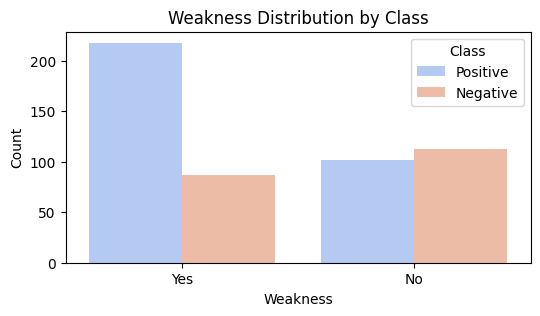

In [132]:
# Countplot for Weakness across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Weakness", hue="Class", data=df, palette="coolwarm")
plt.title("Weakness Distribution by Class")
plt.xlabel("Weakness")
plt.ylabel("Count")
plt.show()

#### **7. Distribution of Polyphagia(Excessive hunger) across the Class (Positive/Negative)**

In [133]:
# Check the order of value_counts()
print(df["Polyphagia"].value_counts())

Polyphagia
No     283
Yes    237
Name: count, dtype: int64


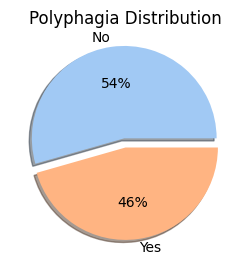

In [134]:
# Pie Chart for Polyphagia Distribution
plt.figure(figsize=(5, 3))
df["Polyphagia"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                       labels=["No", "Yes"], explode=[0.1, 0], shadow=True)
plt.title("Polyphagia Distribution")
plt.ylabel("")
plt.show()

In [135]:
# Crosstab for Polyphagia and Class
plot_criteria = ["Polyphagia", "Class"]
cm = sns.light_palette("red", as_cmap=True)
crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)


Class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


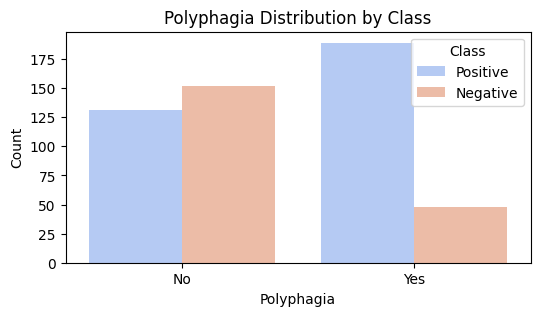

In [136]:
# Countplot for Polyphagia across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Polyphagia", hue="Class", data=df, palette="coolwarm")
plt.title("Polyphagia Distribution by Class")
plt.xlabel("Polyphagia")
plt.ylabel("Count")
plt.show()

#### **8. Distribution of Genital Thrush(Fungal infection) across the Class (Positive/Negative)**

In [137]:
# Check the order of value_counts()
print(df["Genital Thrush"].value_counts())

Genital Thrush
No     404
Yes    116
Name: count, dtype: int64


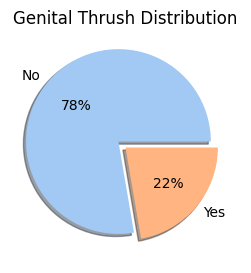

In [138]:
# Pie Chart for Genital Thrush Distribution
plt.figure(figsize=(5, 3))
df["Genital Thrush"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                       labels=["No", "Yes"], explode=[0.1, 0], shadow=True)
plt.title("Genital Thrush Distribution")
plt.ylabel("")
plt.show()

In [139]:
# Crosstab for Genital Thrush and Class
plot_criteria = ["Genital Thrush", "Class"]
cm = sns.light_palette("red", as_cmap=True)
crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)

Class,Negative,Positive
Genital Thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


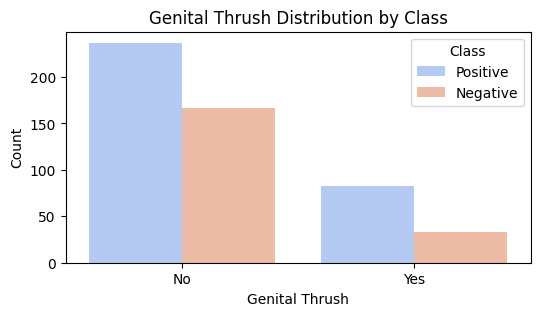

In [140]:
# Countplot for Genital Thrush across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Genital Thrush", hue="Class", data=df, palette="coolwarm")
plt.title("Genital Thrush Distribution by Class")
plt.xlabel("Genital Thrush")
plt.ylabel("Count")
plt.show()

#### **9. Distribution of Visual Blurring(Blurred vision) across the Class (Positive/Negative)**

In [141]:
# Check the order of value_counts()
print(df["Visual Blurring"].value_counts())

Visual Blurring
No     287
Yes    233
Name: count, dtype: int64


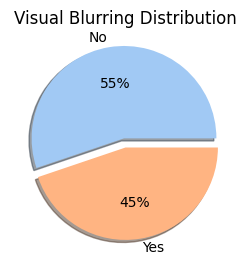

In [142]:
# Pie Chart for Visual Blurring Distribution
plt.figure(figsize=(5, 3))
df["Visual Blurring"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                       labels=["No", "Yes"], explode=[0.1, 0], shadow=True)
plt.title("Visual Blurring Distribution")
plt.ylabel("")
plt.show()

In [143]:
# Crosstab for Visual Blurring and Class
plot_criteria = ["Visual Blurring", "Class"]
cm = sns.light_palette("red", as_cmap=True)
crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)

Class,Negative,Positive
Visual Blurring,,
No,71.000000,45.310000
Yes,29.000000,54.690000


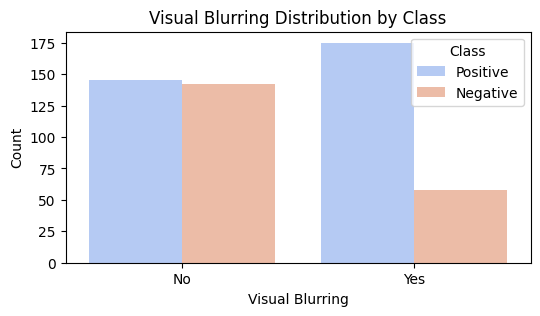

In [144]:
# Countplot for Visual Blurring across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Visual Blurring", hue="Class", data=df, palette="coolwarm")
plt.title("Visual Blurring Distribution by Class")
plt.xlabel("Visual Blurring")
plt.ylabel("Count")
plt.show()

#### **10. Distribution of Itching(Skin irritation) across the Class (Positive/Negative)**

In [145]:
# Check the order of value_counts()
print(df["Itching"].value_counts())

Itching
No     267
Yes    253
Name: count, dtype: int64


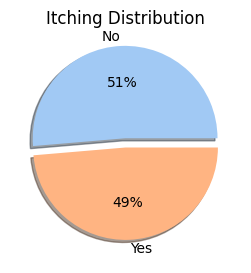

In [146]:
# Pie Chart for Itching Distribution
plt.figure(figsize=(5, 3))
df["Itching"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                       labels=["No", "Yes"], explode=[0.1, 0], shadow=True)
plt.title("Itching Distribution")
plt.ylabel("")
plt.show()

In [147]:
# Crosstab for Itching and Class
plot_criteria = ["Itching", "Class"]
cm = sns.light_palette("red", as_cmap=True)
crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)

Class,Negative,Positive
Itching,,
No,50.500000,51.880000
Yes,49.500000,48.120000


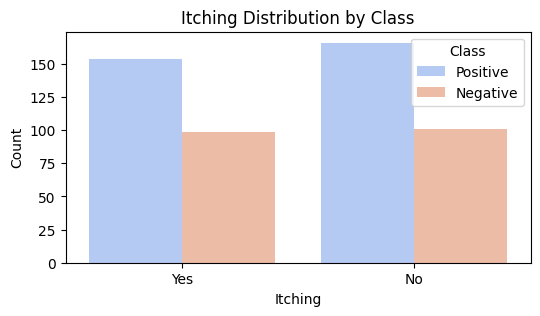

In [148]:
# Countplot for Itching across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Itching", hue="Class", data=df, palette="coolwarm")
plt.title("Itching Distribution by Class")
plt.xlabel("Itching")
plt.ylabel("Count")
plt.show()

#### **11. Distribution of Irritability(Frequent mood swings) across the Class (Positive/Negative)**

In [149]:
# Check the order of value_counts()
print(df["Irritability"].value_counts())

Irritability
No     394
Yes    126
Name: count, dtype: int64


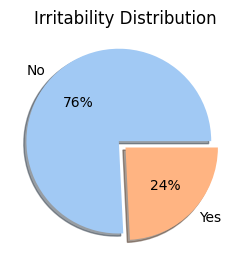

In [150]:
# Pie Chart for Irritability Distribution
plt.figure(figsize=(5, 3))
df["Irritability"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                       labels=["No", "Yes"], explode=[0.1, 0], shadow=True)
plt.title("Irritability Distribution")
plt.ylabel("")
plt.show()

In [151]:
# Crosstab for Irritability and Class
plot_criteria = ["Irritability", "Class"]
cm = sns.light_palette("red", as_cmap=True)
crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)

Class,Negative,Positive
Irritability,,
No,92.000000,65.620000
Yes,8.000000,34.380000


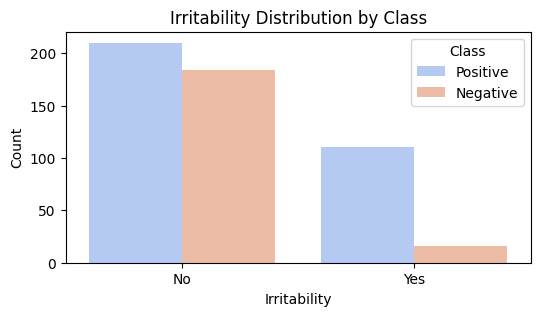

In [152]:
# Countplot for Irritability across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Irritability", hue="Class", data=df, palette="coolwarm")
plt.title("Irritability Distribution by Class")
plt.xlabel("Irritability")
plt.ylabel("Count")
plt.show()

#### **12. Distribution of Delayed Healing(Slow wound healing) across the Class (Positive/Negative)**

In [153]:
# Check the order of value_counts()
print(df["Delayed Healing"].value_counts())

Delayed Healing
No     281
Yes    239
Name: count, dtype: int64


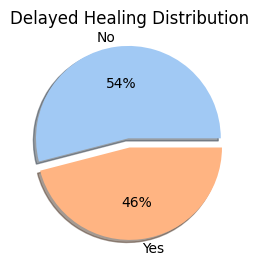

In [154]:
# Pie Chart for Delayed Healing Distribution
plt.figure(figsize=(5, 3))
df["Delayed Healing"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                       labels=["No", "Yes"], explode=[0.1, 0], shadow=True)
plt.title("Delayed Healing Distribution")
plt.ylabel("")
plt.show()

In [155]:
# Crosstab for Delayed Healing and Class
plot_criteria = ["Delayed Healing", "Class"]
cm = sns.light_palette("red", as_cmap=True)
crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)

Class,Negative,Positive
Delayed Healing,,
No,57.000000,52.190000
Yes,43.000000,47.810000


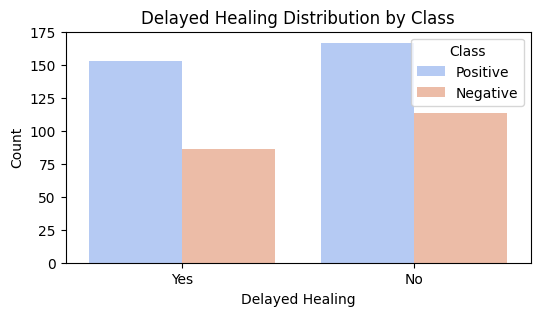

In [156]:
# Countplot for Delayed Healing across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Delayed Healing", hue="Class", data=df, palette="coolwarm")
plt.title("Delayed Healing Distribution by Class")
plt.xlabel("Delayed Healing")
plt.ylabel("Count")
plt.show()

#### **13. Distribution of Partial Paresis(Muscle weakness) across the Class (Positive/Negative)**

In [157]:
# Check the order of value_counts()
print(df["Partial Paresis"].value_counts())

Partial Paresis
No     296
Yes    224
Name: count, dtype: int64


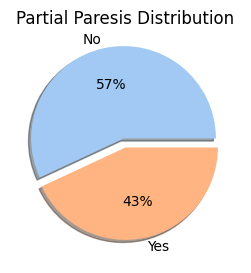

In [158]:
# Pie Chart for Partial Paresis Distribution
plt.figure(figsize=(5, 3))
df["Partial Paresis"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                       labels=["No", "Yes"], explode=[0.1, 0], shadow=True)
plt.title("Partial Paresis Distribution")
plt.ylabel("")
plt.show()

In [159]:
# Crosstab for Partial Paresis and Class
plot_criteria = ["Partial Paresis", "Class"]
cm = sns.light_palette("red", as_cmap=True)
crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)

Class,Negative,Positive
Partial Paresis,,
No,84.000000,40.000000
Yes,16.000000,60.000000


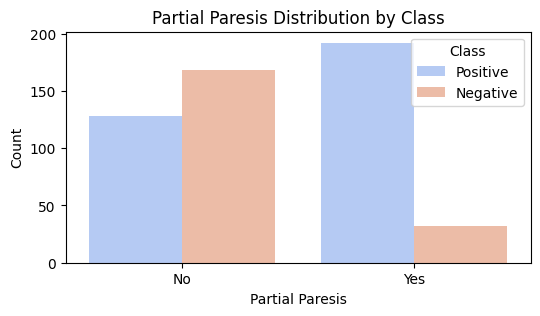

In [160]:
# Countplot for Partial Paresis across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Partial Paresis", hue="Class", data=df, palette="coolwarm")
plt.title("Partial Paresis Distribution by Class")
plt.xlabel("Partial Paresis")
plt.ylabel("Count")
plt.show()

#### **14. Distribution of Muscle Stiffness(Stiff or tight muscles) vs Class (Positive/Negative)**

In [161]:
# Check the order of value_counts()
print(df["Muscle Stiffness"].value_counts())

Muscle Stiffness
No     325
Yes    195
Name: count, dtype: int64


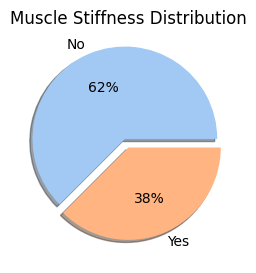

In [162]:
# Pie Chart for Muscle Stiffness Distribution
plt.figure(figsize=(5, 3))
df["Muscle Stiffness"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                       labels=["No", "Yes"], explode=[0.1, 0], shadow=True)
plt.title("Muscle Stiffness Distribution")
plt.ylabel("")
plt.show()

In [163]:
# Crosstab for Muscle Stiffness and Class
plot_criteria = ["Muscle Stiffness", "Class"]
cm = sns.light_palette("red", as_cmap=True)
crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)

Class,Negative,Positive
Muscle Stiffness,,
No,70.000000,57.810000
Yes,30.000000,42.190000


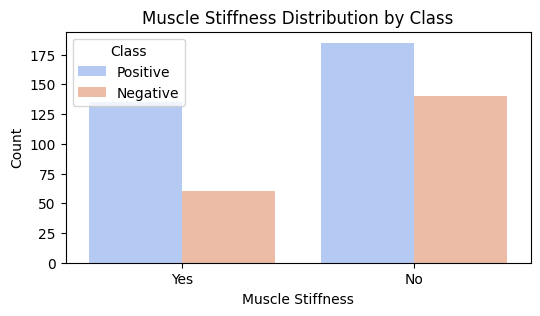

In [164]:
# Countplot for Muscle Stiffness across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Muscle Stiffness", hue="Class", data=df, palette="coolwarm")
plt.title("Muscle Stiffness Distribution by Class")
plt.xlabel("Muscle Stiffness")
plt.ylabel("Count")
plt.show()

#### **15. Distribution of Alopecia(Hair loss) vs Class (Positive/Negative)**

In [165]:
# Check the order of value_counts()
print(df["Alopecia"].value_counts())

Alopecia
No     341
Yes    179
Name: count, dtype: int64


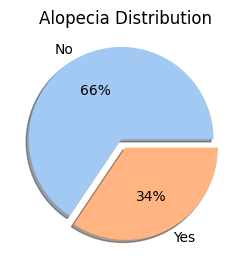

In [166]:
# Pie Chart for Alopecia Distribution
plt.figure(figsize=(5, 3))
df["Alopecia"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                       labels=["No", "Yes"], explode=[0.1, 0], shadow=True)
plt.title("Alopecia Distribution")
plt.ylabel("")
plt.show()

In [167]:
# Crosstab for Alopecia and Class
plot_criteria = ["Alopecia", "Class"]
cm = sns.light_palette("red", as_cmap=True)
crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)

Class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


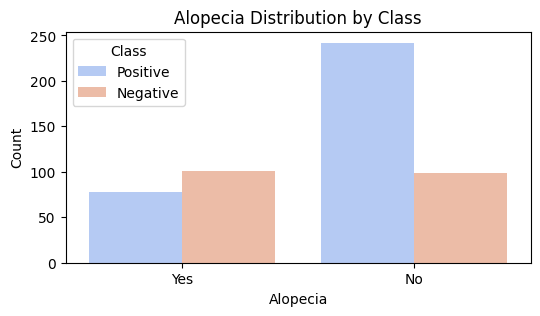

In [168]:
# Countplot for Alopecia across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Alopecia", hue="Class", data=df, palette="coolwarm")
plt.title("Alopecia Distribution by Class")
plt.xlabel("Alopecia")
plt.ylabel("Count")
plt.show()

#### **16. Distribution of Obesity(Overweight condition) vs Class (Positive/Negative)**

In [169]:
# Check the order of value_counts()
print(df["Obesity"].value_counts())

Obesity
No     432
Yes     88
Name: count, dtype: int64


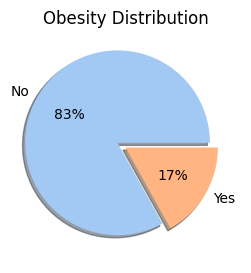

In [170]:
# Pie Chart for Obesity Distribution
plt.figure(figsize=(5, 3))
df["Obesity"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                       labels=["No", "Yes"], explode=[0.1, 0], shadow=True)
plt.title("Obesity Distribution")
plt.ylabel("")
plt.show()

In [171]:
# Crosstab for Obesity and Class
plot_criteria = ["Obesity", "Class"]
cm = sns.light_palette("red", as_cmap=True)
crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)

Class,Negative,Positive
Obesity,,
No,86.500000,80.940000
Yes,13.500000,19.060000


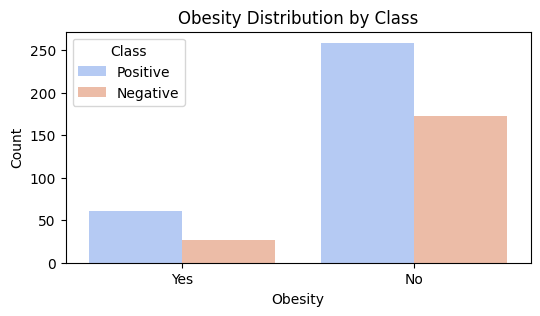

In [172]:
# Countplot for Obesity across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Obesity", hue="Class", data=df, palette="coolwarm")
plt.title("Obesity Distribution by Class")
plt.xlabel("Obesity")
plt.ylabel("Count")
plt.show()

### **Step 4: Data Cleaning**
- **a) Handling Missing Values if there:**
    - Impute missing values with mean, median, or mode.
    - Remove rows with missing values if they are negligible.
- **b) Drop Duplicate Values:**
    - Identify and remove duplicate rows to avoid redundancy if there.
- **d) Outlier Detection and Removal using (IQR or Z-score) etc**
    - Only applicable for numerical columns

In [173]:
# Check for missing values
print(df.isnull().sum())

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
Sudden Weight Loss    0
Weakness              0
Polyphagia            0
Genital Thrush        0
Visual Blurring       0
Itching               0
Irritability          0
Delayed Healing       0
Partial Paresis       0
Muscle Stiffness      0
Alopecia              0
Obesity               0
Class                 0
dtype: int64


In [174]:
# Filling missing values with mean for numerical columns
# df.fillna(df.mean(), inplace=True)

# Alternatively, you can use median or mode
# df['column_name'].fillna(df['column_name'].median(), inplace=True)
# df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)

# But in my data, there is no any missing value. Sothat, I will not apply. 

In [175]:
# # Checking for duplicates
# duplicates = df.duplicated().sum()
# print(f"Number of duplicate rows: {duplicates}")

# # Dropping duplicate rows
# df.drop_duplicates(inplace=True)

# Here, we are not removing duplicates values because of small data sets. So how to handle duplicated values, 
# for this there is solution i.e Random Forest Model:Tree-based models like Random Forests might handle duplicates 
# better, as they split data based on distinct features.

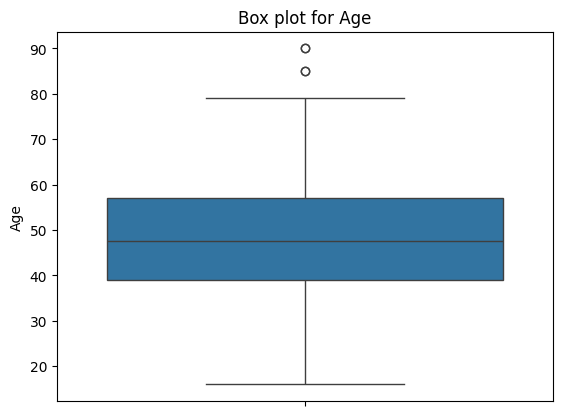

In [176]:
# Boxplot to check outlier present in the datasets or not
sns.boxplot(df["Age"])
plt.title("Box plot for Age")
plt.show()

**From the boxplot above, we observe that there are only a few outliers present, and therefore, it is not necessary to remove them.**

### **Step 5: Data Preprocessing (Feature Scaling & Encoding)**
    - **a) Encoding:**
        - For categorical variables, use one-hot encoding or label encoding.
        - For ordinal variables, use ordinal encoding.
    - **b) Feature Scaling:**
        - Standardization: Convert the data so that it has a mean of 0 and a standard deviation of 1.
        - Min-Max Scaling: Normalize the data so that it lies between 0 and 1.


#### **Segregate into input(X) and output(y) (predictor and target variables)**

In [177]:
# Changing Postive to 1 and Negative to 0
df['Class'] = df['Class'].apply(lambda x: 1 if x=='Positive' else 0)
df['Class']

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: Class, Length: 520, dtype: int64

In [178]:
# Define features (X) and target (y)
X = df.drop(columns=['Class'])
y = df['Class']

#### **Encode categorical columns using Label Encoder**

In [179]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

In [ ]:
# Display few rows of X features
X.head()

,Age,Gender,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


#### **Standardize the numerical column (Age)**

In [182]:
# Scale numerical features
scaler = StandardScaler()

# Fit and transform only on numerical columns
X[['Age']] = scaler.fit_transform(X[['Age']])

In [183]:
# Display few rows of X features
X.head()

,Age,Gender,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity
0,-0.661367,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,0.821362,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,-0.578993,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,-0.249498,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,0.986110,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


#### **Correlation between features**

In [184]:
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
Sudden Weight Loss    0.436568
Weakness              0.243275
Polyphagia            0.342504
Genital Thrush        0.110288
Visual Blurring       0.251300
Itching              -0.013384
Irritability          0.299467
Delayed Healing       0.046980
Partial Paresis       0.432288
Muscle Stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

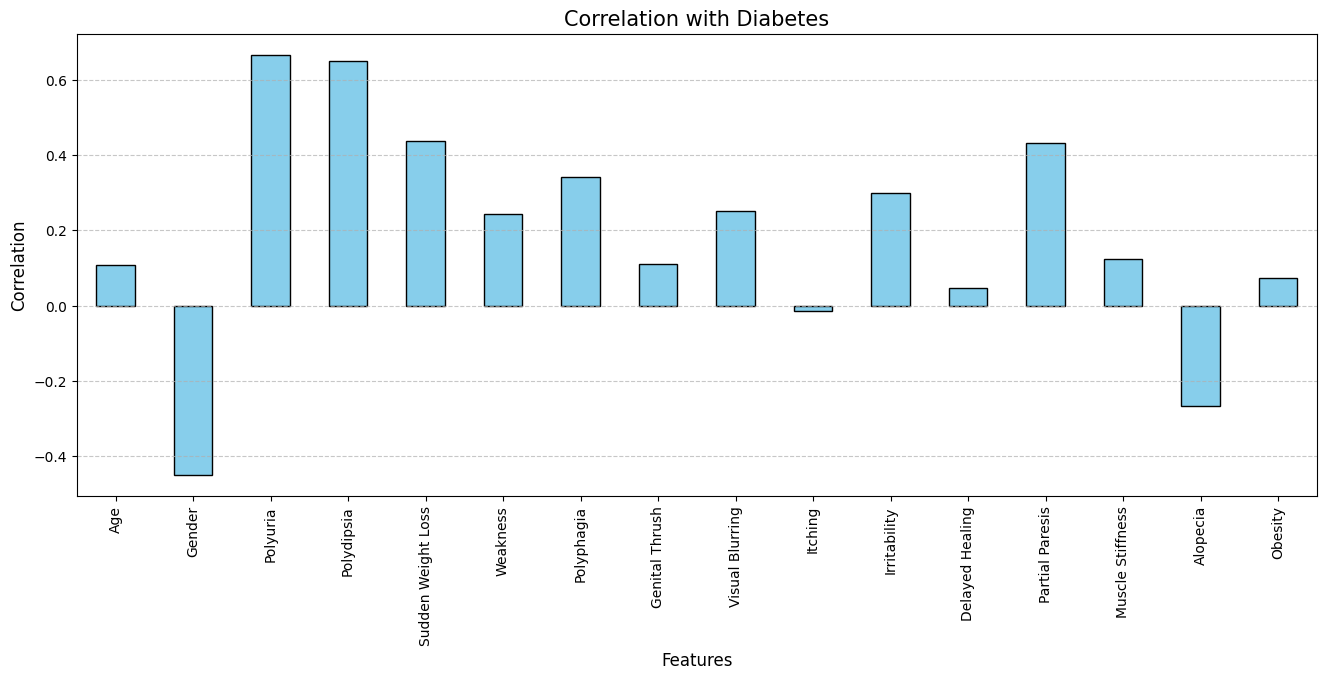

In [ ]:
# PLot the correlation between features and Target Variable
plt.figure(figsize=(16, 6))
X.corrwith(y).plot.bar(color='skyblue', edgecolor='black')

# Adding title and labels
plt.title("Correlation with Diabetes", fontsize=15)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlation", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show plot
plt.show()

### **Step 6: Split the data into Train and Test data**

In [194]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # also train_size = 0.8

# Display the shape of the training and testing data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (416, 16)
Shape of X_test: (104, 16)
Shape of y_train: (416,)
Shape of y_test: (104,)
